In [15]:
# importing libraries for the project
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
#%matplotlib inline # inline magic command added to display plots 
import warnings 
warnings.filterwarnings('ignore') 

### Project description 

For this analysis we use the Formula 1 World Championship (1950 - 2024) data which is publicly available (https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020/code)
The data was retrieved on 7/01/2025 

### Note:

A brief description of the contents of the files used are given below. Also note that 1950 is the 4th season of F1.
- "status.csv" - information containing car driver status i.e. whether the driver has finished, had an accident, collision, engine failure, been lapped, etc ,
- "sprint_results.csv"  - race data for the sprint race calendar.
- "seasons.csv" - F1 seasons, years 1950-2024. 
- "results.csv" - data file contains results for the races. 
- "races.csv" - details of circuits between 1950 and 2024. Each circuit has a unique id which identifies it. 
- "qualifying.csv" - results for qualifying times (Q1,Q2,Q3). 
- "pit_stops.csv" - pitstops during races. Units given in miliseconds.
- "lap_times.csv" - lap times between 1950-2024.
- "drivers.csv" - unique id to identify each driver.
- "driver_standings.csv" - driver standings following each race. 
- "constructors.csv" - unique id to identify each constructor.
- "constructor_standings.csv" - constructor/team standings after each race. 
- "constructor_results.csv" - constructor/team standings after each season.
- "circuits.csv" - longitude and latitude data for each circuit. 


In [16]:
circuitsdata = pd.read_csv('./circuits.csv',low_memory=False) 
circuitsdata.head() 

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [17]:
statusdata = pd.read_csv('./status.csv',low_memory=False) 
statusdata.head() 

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [18]:
racedata = pd.read_csv('./results.csv',low_memory=False)
racedata.head() 

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


### EDA: Max Verstappen & Mika Häkkinen 

In [19]:
import pandas as pd

# Upload results file for Max Verstappen (driverId 830)
results_file_path = 'results.csv'
verstappen_data = pd.read_csv(results_file_path)

# Filter for Max Verstappen's rows (driverId 830)
verstappen_rows = verstappen_data[verstappen_data['driverId'] == 830]

# Display the first few rows of Verstappen's data to confirm filtering
verstappen_rows.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
22546,22550,926,830,5,33,11,\N,R,13,0.0,32,\N,\N,30,13,1:34.295,202.458,5
22558,22562,927,830,5,33,6,7,7,7,6.0,56,+1:37.762,6163555,42,9,1:44.579,190.810,1
22588,22592,928,830,5,33,13,17,17,17,0.0,52,\N,\N,46,14,1:43.880,188.906,7
22609,22613,929,830,5,33,15,\N,R,18,0.0,34,\N,\N,32,16,1:39.607,195.600,10
22622,22626,930,830,5,33,6,11,11,11,0.0,65,\N,\N,46,12,1:31.896,182.358,11


In [20]:
# Displaying results for Mika Hakkinen using a .describe function 
hakkinen_rows = verstappen_data[verstappen_data['driverId'] == 57]
hakkinen_rows.describe() 

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,statusId
count,165.000000,165.000000,165.0,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,4515.193939,226.321212,57.0,7.012121,7.072727,9.884848,2.545455,46.781818,8.909091
std,1264.633032,52.413109,0.0,12.294153,6.767537,7.864249,3.379375,24.753190,15.080199
min,2573.000000,141.000000,57.0,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,3475.000000,182.000000,57.0,1.000000,3.000000,3.000000,0.000000,25.000000,1.000000
50%,4359.000000,223.000000,57.0,1.000000,5.000000,6.000000,1.000000,53.000000,5.000000
75%,5376.000000,265.000000,57.0,1.000000,8.000000,18.000000,4.000000,68.000000,11.000000
max,6998.000000,320.000000,57.0,32.000000,26.000000,27.000000,10.000000,80.000000,85.000000


### Driver Insurance Pricing: Liam Lawson

Liam Lawson, a newcomer to Formula 1 in 2023, presents a unique case for analysis. Being relatively new to F1, Lawson may not be as widely recognized or scrutinised as more experienced drivers, making his data particularly interesting for exploratory discussions. Additionally, the smaller dataset associated with his career provides a manageable starting point to analyze factors that could influence insurance pricing in the motorsport industry. 

In [21]:
#Displaying results for Liam Lawson, driver ID is 859
driver_859_rows = racedata[racedata['driverId'] == 859]
driver_859_rows 

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
26092,26098,1111,859,213,40,19,13,13,13,0.0,72,+26.147,8670558,49,12,1:14.820,204.923,1
26110,26116,1112,859,213,40,12,11,11,11,0.0,51,+1:10.638,4491781,44,8,1:25.842,242.944,1
26128,26134,1113,859,213,40,10,9,9,9,2.0,62,+1:05.918,6463336,47,15,1:39.028,179.585,1
26150,26156,1114,859,213,40,11,11,11,11,0.0,52,\N,\N,50,15,1:38.267,212.738,11
26176,26182,1115,859,213,40,17,17,17,17,0.0,56,\N,\N,54,16,1:27.113,223.943,11


In [22]:
row_lawson = statusdata[statusdata['statusId'] == 1] #status ID number can be changed between 1-141 
print(row_lawson)

   statusId    status
0         1  Finished


The analysis of Liam Lawson's 2023 race data, as observed in the statusID (last) column, indicates an absence of critical incidents such as crashes, collisions, disqualifications, accidents, or mechanical failures. Specifically, no occurrences of engine or gearbox failures were recorded, nor were there any issues related to transmissions, clutches, hydraulics, or electrical systems. This data could serve as a valuable input for actuarial models used in motorsport insurance pricing.

From an underwriting perspective, the absence of such incidents suggests a lower risk profile for Lawson, potentially making him a more attractive candidate for insurance coverage. Actuarial teams could use this information to evaluate the relative risk of insuring drivers or teams. For instance, insurers might assign higher premiums or decline coverage altogether for drivers or teams with higher rates of race non-completions due to incidents or mechanical failures, compared to a driver like Lawson who demonstrates a consistent ability to finish races without issue. This approach could align with risk-based pricing strategies, where premium rates are directly correlated with the likelihood of claims based on historical performance and reliability metrics.

Such data-driven insights would enable insurers to more accurately assess and price the risk associated with individual drivers and teams, fostering a more robust and equitable insurance framework within motorsport. Additionally, Lawson's team and constructor represents plays a critical role in the risk assessment process. Constructors vary significantly in their reliability, resources, and technical expertise, all of which directly influence a driver’s likelihood of completing races without mechanical issues. For example, a driver racing for a constructor known for frequent engine or gearbox failures may be perceived as higher risk, even if their personal record is clean. Conversely, a constructor with a reputation for producing highly reliable cars, such as those with strong technical development programs and consistent race finishes, may positively impact Lawson's perceived risk profile. Insurers would need to incorporate constructor-specific reliability data alongside driver performance metrics to build a comprehensive risk model. The above panel also shows Lawson's constructor ID.

Such data-driven insights would enable insurers to more accurately assess and price the risk associated with individual drivers and teams, fostering a more robust and equitable insurance framework within motorsport.

### Motosport Insurance Pricing 

In [23]:
constructorsdata = pd.read_csv("./constructors.csv", low_memory=False)
constructorsrows = constructorsdata[constructorsdata['constructorId'] == 213] #change number for different constructorID
constructorsrows

,constructorId,constructorRef,name,nationality,url
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri


The code in the above panel helps us identify the name of the constructor for Liam Lawson: AlphaTauri. The analysis below helps identify the race information on the Italian constructor Alphatauri, showing crashes, collisions, accidents in the "statusID" column. The codes below provide race statuses and relevant visualisations specific to the constructor. 

In [24]:
constructor213 = racedata[racedata['constructorId'] == 213]
constructor213

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
24626,24632,1031,842,213,10,12,7,7,7,6.0,71,+16.682,5472421,64,11,1:09.025,225.205,1
24631,24637,1031,826,213,26,13,12,12,12,0.0,69,\N,\N,50,13,1:09.135,224.847,22
24649,24655,1032,826,213,26,13,10,10,10,1.0,70,\N,\N,60,13,1:08.378,227.336,11
24654,24660,1032,842,213,10,7,15,15,15,0.0,70,\N,\N,69,8,1:07.827,229.183,11
24671,24677,1033,826,213,26,17,12,12,12,0.0,69,\N,\N,51,18,1:20.946,194.841,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26232,26238,1118,817,213,3,17,13,13,13,0.0,70,\N,\N,68,3,1:13.866,210.007,11
26253,26259,1119,817,213,3,14,14,14,14,0.0,50,+48.525,5396814,50,12,1:37.108,229.884,1
26257,26263,1119,852,213,22,20,18,18,18,0.0,46,\N,\N,45,18,1:37.587,228.755,6
26267,26273,1120,852,213,22,6,8,8,8,4.0,58,+43.088,5265712,55,16,1:29.256,213.000,1


In [25]:
constructor213.describe()

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,statusId
count,166.000000,166.000000,166.000000,166.0,166.000000,166.000000,166.000000,166.000000,166.000000
mean,25457.373494,1075.783133,844.638554,213.0,11.421687,12.373494,1.843373,53.403614,10.560241
std,481.744499,26.317893,10.321003,0.0,4.941158,4.506456,3.677885,19.219302,24.465052
min,24632.000000,1031.000000,817.000000,213.0,0.000000,1.000000,0.000000,0.000000,1.000000
25%,25046.500000,1054.250000,842.000000,213.0,8.000000,9.000000,0.000000,51.000000,1.000000
50%,25457.000000,1076.000000,842.000000,213.0,11.500000,12.000000,0.000000,56.500000,2.000000
75%,25871.750000,1098.750000,852.000000,213.0,16.000000,15.000000,2.000000,66.000000,11.000000
max,26276.000000,1120.000000,859.000000,213.0,20.000000,20.000000,25.000000,87.000000,140.000000


In [26]:
row_constructor = statusdata[statusdata['statusId'] == 3] #change status ID number between 1-141 
print(row_constructor)

   statusId    status
2         3  Accident


    Status ID  Count
0           1     83
1           3      4
2           4      5
3           5      2
4           6      1
5          10      1
6          11     53
7          12      3
8          22      4
9          23      1
10         24      1
11         31      1
12         34      1
13        130      2
14        131      3
15        140      1


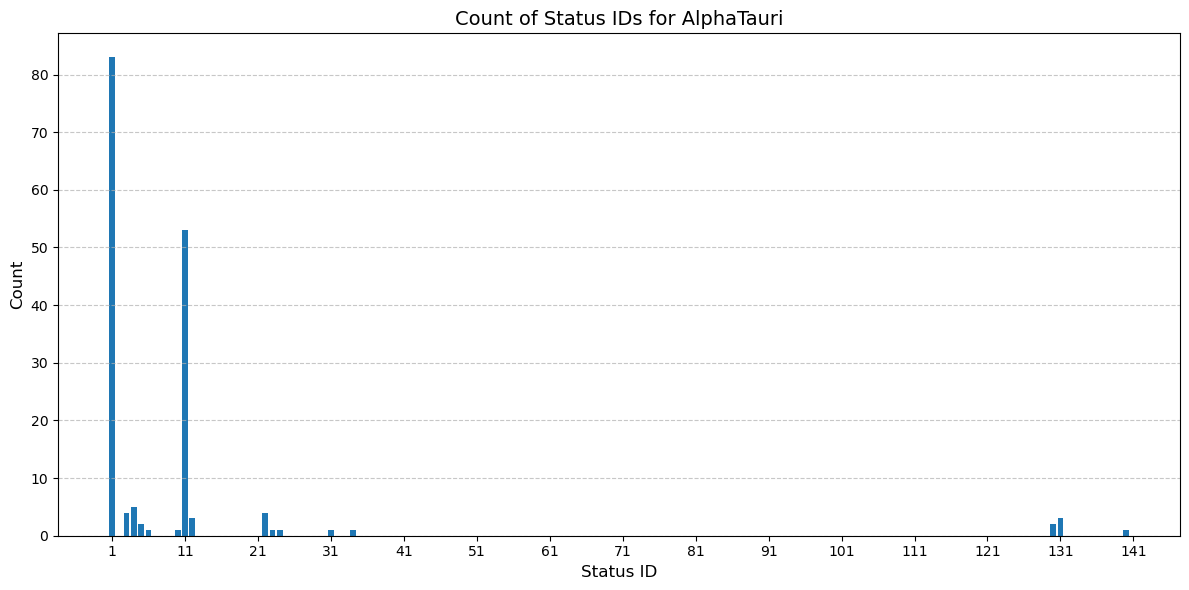

In [34]:
# Count the occurrences of each statusId for the constructor
status_counts = constructor213['statusId'].value_counts().sort_index()

status_table = pd.DataFrame({
    "Status ID": status_counts.index,
    "Count": status_counts.values
})

print(status_table)

# Visualize the count of each statusId
plt.figure(figsize=(12, 6))
plt.bar(status_counts.index, status_counts.values)
plt.title("Count of Status IDs for AlphaTauri", fontsize=14)
plt.xlabel("Status ID", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(range(1, 142, 10))  # Tick every 10 status IDs for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

For Liam Lawson, the reliability of Constructor 213 is an essential factor in shaping his risk profile. As a driver, his performance cannot be entirely isolated from the team's overall reliability and car performance. The high frequency of Status ID 1 suggests Lawson operates within a relatively dependable setup, enhancing his perceived risk profile positively. However, the occurrences of Status ID 11 and other non-completion statuses indicate that Constructor 213, while generally reliable, does encounter notable reliability issues.

If an insurer were to assess Lawson’s risk for motorsport coverage, they would likely consider this data alongside his personal race record. With no personal crashes, collisions, or mechanical failures recorded for Lawson in 2023, his clean status profile stands out, particularly when contrasted with the broader constructor data. This could make him an attractive candidate for coverage, despite some risks associated with his constructor’s historical reliability issues.

Conclusion
The detailed status data for Constructor 213 provides valuable insights into the reliability and performance trends of Lawson’s team. By contextualizing Lawson’s individual performance within the constructor’s broader record, stakeholders—whether insurers, sponsors, or analysts—can make more informed decisions regarding his risk assessment and future potential.